# Lecture 07. Time Series

### Instructor: Luping Yu

### Apr 9, 2024

***

**Time series data** is an important form of structured data in many different fields, such as finance, economics, ecology, neuroscience, and physics. Anything that is observed or measured at many points in time forms a time series. 

Many time series are fixed frequency, which is to say that data points occur at regular intervals according to some rule, such as every 15 seconds, every 5 minutes, or once per month.

How you mark and refer to time series data depends on the application, and you may have one of the following:
* **Timestamps**: specific instants in time.
* **Fixed periods**: such as the month January 2007 or the full year 2010.
* **Intervals of time**: indicated by a start and end timestamp. (periods can be thought of as special cases of intervals)

The simplest and most widely used kind of time series are those indexed by **timestamp**.

![avatar](https://raw.githubusercontent.com/lazydingding/gallery/main/date_stamp.jpg)


***
##  Date and Time Data Types and Tools

The Python standard library includes data types for date and time data, as well as calendar-related functionality. The <code>datetime</code>, <code>time</code>, and <code>calendar</code> modules are the main places to start. The <code>datetime.datetime</code> type, or simply <code>datetime</code>, is widely used:

In [1]:
from datetime import datetime

now = datetime.now()

now

datetime.datetime(2024, 4, 9, 13, 31, 59, 776129)

In [2]:
now.year, now.month, now.day

(2024, 4, 9)

<code>datetime</code> stores both the date and time down to the microsecond. <code>timedelta</code> represents the temporal difference between two datetime objects:

In [3]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

delta

datetime.timedelta(days=926, seconds=56700)

In [4]:
delta.days

926

You can add (or subtract) a <code>timedelta</code> or multiple thereof to a <code>datetime</code> object to yield a new shifted object:

In [5]:
from datetime import timedelta

start = datetime(2011, 1, 7)

start - timedelta(2)

datetime.datetime(2011, 1, 5, 0, 0)

In [6]:
start + 2 * timedelta(weeks=2)

datetime.datetime(2011, 2, 4, 0, 0)

The following table summarizes the data types in the <code>datetime</code> module. While this chapter is mainly concerned with the data types in pandas and higher-level time series manipulation, you may encounter the datetime-based types in many other places in Python in the wild.

* Types in datetime module:

|Type | Description |
|:- | :- | 
|date | Store calendar date (year, month, day) using the Gregorian calendar
|time | Store time of day as hours, minutes, seconds, and microseconds
|datetime | Stores both date and time
|timedelta | Represents the difference between twodatetimevalues (as days, seconds, and microseconds)
|tzinfo | Base type for storing time zone information

***
### Converting Between String and Datetime

You can format <code>datetime</code> objects and pandas <code>Timestamp</code> objects as strings using <code>str()</code> or the <code>strptime()</code> method, passing a format specification:

In [7]:
stamp = datetime(2011, 1, 3)

str(stamp)

'2011-01-03 00:00:00'

You can use these same format codes to convert strings to dates using <code>datetime.strptime</code>:

In [8]:
value = '99:01:03'

datetime.strptime(value, '%y:%m:%d')

datetime.datetime(1999, 1, 3, 0, 0)

See the following table for a complete list of the format codes.

* Datetime format specification (ISO C89 compatible)

|Type | Description |
|:- | :- | 
|%Y|Four-digit year
|%y|Two-digit year
|%m|Two-digit month [01, 12]
|%d|Two-digit day [01, 31]
|%H|Hour (24-hour clock) [00, 23]
|%I|Hour (12-hour clock) [01, 12]
|%M|Two-digit minute [00, 59]
|%S|Second [00, 61] (seconds 60, 61 account for leap seconds)
|%w|Weekday as integer [0 (Sunday), 6]
|%U|Week number of the year [00, 53]; Sunday is considered the first day of the week, and days before the first Sunday of the year are "week 0"
|%W|Week number of the year [00, 53]; Monday is considered the first day of the week, and days before the first Monday of the year are "week 0"
|%z|UTC time zone offset as+HHMMor-HHMM; empty if time zone naive
|%F|Shortcut for%Y-%m-%d (e.g.,2012-4-18)
|%D|Shortcut for%m/%d/%y (e.g.,04/18/12)



<code>datetime.strptime</code> is a good way to parse a date with a **known** format.

However, it can be a bit annoying to have to write a format spec each time, especially for common date formats. In this case, you can use the <code>parser.parse()</code> method:

In [9]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

<code>dateutil.parser</code> is capable of parsing most human-intelligible date representations:

In [10]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

<code>dateutil.parser</code> is a useful but **imperfect** tool. Notably, it will recognize some strings as dates that you might prefer that it didn't.

In international locales, day appearing before month is very common, so you can pass <code>dayfirst=True</code> to indicate this:

In [11]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas is generally oriented toward working with arrays of dates, whether used as an axis index or a column in a DataFrame.

The <code>to_datetime()</code> method parses many different kinds of date representations:

In [12]:
import pandas as pd

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

***
##  Time Series Basics

A basic kind of time series object in pandas is a **Series indexed by timestamps**:

In [13]:
import numpy as np
import pandas as pd
from datetime import datetime

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)

ts

2011-01-02   -0.054540
2011-01-05   -1.452680
2011-01-07   -1.222299
2011-01-08    0.845662
2011-01-10    0.819327
2011-01-12    1.533130
dtype: float64

These **datetime** objects have been put in a <code>DatetimeIndex</code>:

In [14]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Scalar values from a <code>DatetimeIndex</code> are pandas <code>Timestamp</code> objects. A Timestamp can be substituted anywhere you would use a datetime object.

In [15]:
stamp = ts.index[0]

stamp

Timestamp('2011-01-02 00:00:00')

***
### Indexing, Selection, Subsetting

Time series behaves like any other <code>pandas.Series</code> when you are indexing and selecting data based on label:

In [16]:
ts

2011-01-02   -0.054540
2011-01-05   -1.452680
2011-01-07   -1.222299
2011-01-08    0.845662
2011-01-10    0.819327
2011-01-12    1.533130
dtype: float64

In [17]:
stamp = ts.index[2]

stamp

Timestamp('2011-01-07 00:00:00')

In [18]:
ts[stamp]

-1.2222987560889347

As a convenience, you can also pass a string that is interpretable as a date:

In [19]:
ts['Jan/07/2011']

-1.2222987560889347

In [20]:
ts['20110107']

-1.2222987560889347

For longer time series, a year or only a year and month can be passed to easily select slices of data:

In [21]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

longer_ts

2000-01-01   -0.971053
2000-01-02    1.703351
2000-01-03    0.834129
2000-01-04    0.883907
2000-01-05   -0.399308
                ...   
2002-09-22   -0.074547
2002-09-23    0.287642
2002-09-24   -0.464423
2002-09-25   -0.158956
2002-09-26   -0.303269
Freq: D, Length: 1000, dtype: float64

In [22]:
longer_ts['2001']

2001-01-01    1.273944
2001-01-02   -1.069847
2001-01-03   -0.448148
2001-01-04    1.441058
2001-01-05    2.731037
                ...   
2001-12-27   -0.805345
2001-12-28   -2.795820
2001-12-29    0.757726
2001-12-30    2.490421
2001-12-31    0.631102
Freq: D, Length: 365, dtype: float64

Here, the string '2001' is interpreted as a year and selects that time period. This also works if you specify the month:

In [23]:
longer_ts['2001-05']

2001-05-01   -0.202516
2001-05-02   -0.289729
2001-05-03    0.462309
2001-05-04    0.840080
2001-05-05    0.282923
2001-05-06   -0.080349
2001-05-07    0.272534
2001-05-08   -0.477432
2001-05-09   -0.702566
2001-05-10    0.024940
2001-05-11   -1.315803
2001-05-12   -3.372903
2001-05-13    0.489296
2001-05-14    0.316250
2001-05-15   -1.233380
2001-05-16   -0.662255
2001-05-17    1.368393
2001-05-18   -0.681448
2001-05-19    0.489403
2001-05-20    0.687112
2001-05-21   -1.024462
2001-05-22    1.055923
2001-05-23   -0.896273
2001-05-24   -1.500258
2001-05-25   -0.217289
2001-05-26   -0.916246
2001-05-27    0.490738
2001-05-28    1.010814
2001-05-29   -0.125326
2001-05-30    0.321764
2001-05-31    0.085892
Freq: D, dtype: float64

Slicing with datetime objects works as well:

In [24]:
ts

2011-01-02   -0.054540
2011-01-05   -1.452680
2011-01-07   -1.222299
2011-01-08    0.845662
2011-01-10    0.819327
2011-01-12    1.533130
dtype: float64

In [25]:
ts['1/7/2011':]

2011-01-07   -1.222299
2011-01-08    0.845662
2011-01-10    0.819327
2011-01-12    1.533130
dtype: float64

Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query:

In [26]:
ts['Jan/6/2011':'1/11/2011']

2011-01-07   -1.222299
2011-01-08    0.845662
2011-01-10    0.819327
dtype: float64

As before, you can pass **either** a string date, datetime, or timestamp.

All of this holds true for <code>DataFrame</code> as well, indexing on its rows:

In [27]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Beijing','Shanghai','Guangdong','Fujian'])

long_df

,Beijing,Shanghai,Guangdong,Fujian
2000-01-05,1.870713,-0.341880,-2.833117,0.333079
2000-01-12,0.636795,-0.424131,-0.043427,1.396305
2000-01-19,-0.283841,1.160442,-0.966553,0.004793
2000-01-26,-0.306147,0.013080,2.992733,1.349400
2000-02-02,-0.701973,-1.492168,-0.056151,2.895264
...,...,...,...,...
2001-10-31,-0.100436,-0.103174,-0.610484,0.386021
2001-11-07,-0.364416,1.720275,0.591771,0.690357
2001-11-14,1.615129,1.230127,-0.862831,1.020939
2001-11-21,-0.872607,0.243375,-0.654256,-1.378855


In [28]:
long_df.loc['2001-May']

,Beijing,Shanghai,Guangdong,Fujian
2001-05-02,0.370980,-0.983905,1.889032,0.599216
2001-05-09,-0.229710,1.316715,-2.474710,-1.513700
2001-05-16,-0.673167,-0.708799,1.161846,-0.465323
2001-05-23,-0.961504,-0.593967,0.365625,2.080561
2001-05-30,-0.274783,-0.455767,-0.000266,-0.675003


***
## Date Ranges, Frequencies, and Shifting

Time series in pandas are assumed to be irregular; that is, they have no fixed frequency.

For many applications this is sufficient. However, it's often desirable to work relative to a fixed frequency, such as daily, monthly, or every 15 minutes, even if that means introducing missing values into a time series.

Fortunately pandas has a full suite of standard time series frequencies and tools for **resampling, inferring frequencies, and generating fixed-frequency date ranges**.

While we used it previously without explanation, <code>pandas.date_range</code> is responsible for generating a <code>DatetimeIndex</code> with an indicated length according to a particular frequency:

In [29]:
index = pd.date_range('2012-04-01', '2012-06-01')

index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

By default, <code>date_range()</code> generates **daily** timestamps.

If you pass only a start or end date, you must pass a number of periods to generate:

In [30]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [31]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

The start and end dates define strict boundaries for the generated date index.

For example, if you wanted a date index containing the last business day of each month, you would pass the <code>'BM'</code> frequency (business end of month; see more complete listing of frequencies in the following table) and only dates falling on or inside the date interval will be included:

In [32]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

*  Base time series frequencies (not comprehensive)

|Alias | Offset type | Description |
|:- | :- | :- |
|D|Day|Calendar daily
|B|BusinessDay|Business daily
|H|Hour|Hourly
|T or min|Minute|Minutely
|S|Second|Secondly
|L or ms|Milli|Millisecond (1/1,000 of 1 second)
|U|Micro|Microsecond (1/1,000,000 of 1 second)
|M|MonthEnd|Last calendar day of month
|BM|BusinessMonthEnd|Last business day (weekday) of month
|MS|MonthBegin|First calendar day of month
|BMS|BusinessMonthBegin|First weekday of month
|W-MON, W-TUE, ...|Week|Weekly on given day of week (MON, TUE, WED, THU, FRI, SAT, or SUN)
|WOM-1MON, WOM-2MON, ...|WeekOfMonth|Generate weekly dates in the first, second, third, or fourth week of the month (e.g.,WOM-3FRIfor the third Friday of each month)
|Q-JAN, Q-FEB, ...|QuarterEnd|Quarterly dates anchored on last calendar day of each month, for year ending in indicated month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)
|BQ-JAN, BQ-FEB, ...|BusinessQuarterEnd|Quarterly dates anchored on last weekday day of each month, for year ending in indicated month
|QS-JAN, QS-FEB, ...|QuarterBegin|Quarterly dates anchored on first calendar day of each month, for year ending in indicated month
|BQS-JAN, BQS-FEB, ...|BusinessQuarterBegin|Quarterly dates anchored on first weekday day of each month, for year ending in indicated month
|A-JAN, A-FEB, ...|YearEnd|Annual dates anchored on last calendar day of given month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)
|BA-JAN, BA-FEB, ...|BusinessYearEnd|Annual dates anchored on last weekday of given month
|AS-JAN, AS-FEB, ...|YearBegin|Annual dates anchored on first day of given month
|BAS-JAN, BAS-FEB, ...|BusinessYearBegin|Annual dates anchored on first weekday of given month

***
### Frequencies and Date Offsets
Frequencies in pandas are composed of a **base frequency** and a **multiplier**.

Base frequencies are typically referred to by a string alias, like <code>'M'</code> for monthly or <code>'H'</code> for hourly. Putting an integer before the base frequency creates a multiple:

In [33]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

Some frequencies describe points in time that are **not** evenly spaced. For example, <code>'M'</code> (calendar month end) and <code>'BM'</code> (last business/weekday of month) depend on the number of days in a month and whether the month ends on a weekend or not. We refer to these as **anchored offsets**.

One useful frequency class is "week of month," starting with <code>'WOM'</code>. This enables you to get dates like the third Friday of each month:

In [34]:
third_friday = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

third_friday

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

***
### Shifting (Leading and Lagging) Data

**Shifting** refers to moving data backward and forward through time.

Both Series and DataFrame have a <code>shift()</code> method for doing naive shifts forward or backward, leaving the index unmodified:

In [35]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

ts

2000-01-31    0.776372
2000-02-29    0.602130
2000-03-31    0.807622
2000-04-30   -0.025378
Freq: M, dtype: float64

In [36]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.776372
2000-04-30    0.602130
Freq: M, dtype: float64

In [37]:
ts.shift(-2)

2000-01-31    0.807622
2000-02-29   -0.025378
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

When we shift like this, missing data is introduced either at the start or the end of the time series.

A common use of shift is computing **percent changes in a time series**:

In [38]:
ts

2000-01-31    0.776372
2000-02-29    0.602130
2000-03-31    0.807622
2000-04-30   -0.025378
Freq: M, dtype: float64

In [39]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.224432
2000-03-31    0.341275
2000-04-30   -1.031423
Freq: M, dtype: float64

Because naive shifts leave the index unmodified, some data is **discarded**.

Thus if the frequency is known, it can be passed to shift to advance the timestamps instead of simply the data:

In [40]:
ts

2000-01-31    0.776372
2000-02-29    0.602130
2000-03-31    0.807622
2000-04-30   -0.025378
Freq: M, dtype: float64

In [41]:
ts.shift(2, freq='M')

2000-03-31    0.776372
2000-04-30    0.602130
2000-05-31    0.807622
2000-06-30   -0.025378
Freq: M, dtype: float64

In [42]:
ts.shift(3, freq='D')

2000-02-03    0.776372
2000-03-03    0.602130
2000-04-03    0.807622
2000-05-03   -0.025378
dtype: float64

***
## Periods and Period Arithmetic

**Periods** represent timespans, like days, months, quarters, or years. The <code>Period</code> class represents this data type, requiring a string or integer and a frequency.

In [43]:
p = pd.Period(2007, freq='A-DEC')

p

Period('2007', 'A-DEC')

In this case, the Period object represents the full timespan from January 1, 2007, to December 31, 2007, inclusive.

***
### Period Frequency Conversion
Periods and PeriodIndex objects can be converted to another frequency with their <code>asfreq()</code> method.

As an example, suppose we had an annual period and wanted to convert it into a monthly period either at the start or end of the year. This is fairly straightforward:

In [44]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [45]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

* Period frequency conversion illustration

![avatar](https://raw.githubusercontent.com/lazydingding/gallery/main/Screen%20Shot%202022-04-19%20at%2011.13.09.png)

***
### Quarterly Period Frequencies

Quarterly data is standard in accounting, finance, and other fields. Much quarterly data is reported relative to a **fiscal year end**, typically the last calendar or business day of one of the 12 months of the year.

pandas supports all 12 possible quarterly frequencies as Q-JAN through Q-DEC:

In [46]:
p = pd.Period('2012Q4', freq='Q-JAN')

p

Period('2012Q4', 'Q-JAN')

In the case of fiscal year ending in January, 2012Q4 runs from November through January, which you can check by converting to daily frequency:

In [47]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [48]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

* Different quarterly frequency conventions

![avatar](https://raw.githubusercontent.com/lazydingding/gallery/main/Screen%20Shot%202022-04-19%20at%2011.15.10.png)

***
## Resampling and Frequency Conversion

**Resampling** refers to the process of converting a time series from one frequency to another.

Aggregating higher frequency data to lower frequency is called **downsampling**, while converting lower frequency to higher frequency is called **upsampling**.

pandas objects are equipped with a <code>resample()</code> method, which is the workhorse function for all frequency conversion.

<code>resample()</code> has a similar API to <code>groupby()</code>; you call resample to group the data, then call an aggregation function:

In [49]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts  

2000-01-01    0.806219
2000-01-02    0.370330
2000-01-03    0.961216
2000-01-04   -0.200319
2000-01-05   -1.034883
                ...   
2000-04-05    0.637560
2000-04-06    0.415564
2000-04-07   -0.306579
2000-04-08   -1.635740
2000-04-09    0.229224
Freq: D, Length: 100, dtype: float64

In [50]:
ts.resample('M').mean()

2000-01-31    0.130895
2000-02-29    0.136346
2000-03-31    0.228417
2000-04-30   -0.125458
Freq: M, dtype: float64

In [51]:
ts.resample('M', kind='period').mean()

2000-01    0.130895
2000-02    0.136346
2000-03    0.228417
2000-04   -0.125458
Freq: M, dtype: float64

<code>resample()</code> is a flexible and high-performance method that can be used to process very large time series. The following table summarizes some of its options.

* Resample method arguments

|Argument | Description |
|:- | :- | 
|freq|String or DateOffset indicating desired resampled frequency (e.g., ‘M', ’5min', or Second(15))
|axis|Axis to resample on; default axis=0
|fill_method|How to interpolate when upsampling, as in 'ffill' or 'bfill'; by default does no interpolation
|closed|In downsampling, which end of each interval is closed (inclusive), 'right' or 'left'
|label|In downsampling, how to label the aggregated result, with the 'right' or 'left' bin edge (e.g., the 9:30 to 9:35 five-minute interval could be labeled9:30or9:35)
|loffset|Time adjustment to the bin labels, such as '-1s' / Second(-1) to shift the aggregate labels one second earlier
|limit|When forward or backward filling, the maximum number of periods to fill
|kind|Aggregate to periods ('period') or timestamps ('timestamp'); defaults to the type of index the time series has
|convention|When resampling periods, the convention ('start' or 'end') for convert

***
### Downsampling

Aggregating data to a regular, lower frequency is a pretty normal time series task.

The desired frequency defines bin edges that are used to slice the time series into pieces to aggregate. For example, to convert to monthly, you need to chop up the data into one-month intervals.

Each interval is said to be **half-open**; a data point can only belong to one interval, and the union of the intervals must make up the whole time frame.

To illustrate, let’s look at some one-minute data:

In [52]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

ts = pd.Series(np.arange(12), index=rng)

ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

Suppose you wanted to aggregate this data into five-minute chunks or bars by taking the sum of each group:

In [53]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

***
### Upsampling and Interpolation

When converting from a low frequency to a higher frequency, no aggregation is needed.

Let's consider a DataFrame with some weekly data:

In [54]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.119323,1.484761,1.265667,-0.011257
2000-01-12,-2.276772,0.916513,0.127736,-0.683770


When you are using an aggregation function with this data, there is only one value per group, and missing values result in the gaps.

We use the <code>asfreq</code> method to convert to the higher frequency without any aggregation:

In [55]:
df_daily = frame.resample('D').asfreq()

df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.119323,1.484761,1.265667,-0.011257
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-2.276772,0.916513,0.127736,-0.683770


Suppose you wanted to fill forward each weekly value on the non-Wednesdays:

In [56]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.119323,1.484761,1.265667,-0.011257
2000-01-06,-1.119323,1.484761,1.265667,-0.011257
2000-01-07,-1.119323,1.484761,1.265667,-0.011257
2000-01-08,-1.119323,1.484761,1.265667,-0.011257
2000-01-09,-1.119323,1.484761,1.265667,-0.011257
2000-01-10,-1.119323,1.484761,1.265667,-0.011257
2000-01-11,-1.119323,1.484761,1.265667,-0.011257
2000-01-12,-2.276772,0.916513,0.127736,-0.683770


You can similarly choose to only fill a certain number of periods forward to limit how far to continue using an observed value:

In [57]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.119323,1.484761,1.265667,-0.011257
2000-01-06,-1.119323,1.484761,1.265667,-0.011257
2000-01-07,-1.119323,1.484761,1.265667,-0.011257
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-2.276772,0.916513,0.127736,-0.683770


***
## Moving Window Functions

Before digging in, we can load up some time series data and resample it to business day frequency:

In [58]:
import pandas as pd

close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [59]:
close_px = close_px_all.resample('B').ffill()

close_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


We now introduce the <code>rolling()</code> operator, which behaves similarly to <code>resample()</code> and <code>groupby()</code>. It can be called on a Series or DataFrame along with a window:

<Axes: >

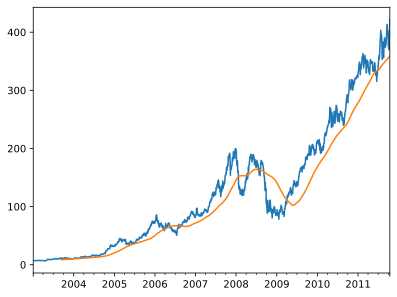

In [60]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

close_px['AAPL'].plot()
close_px['AAPL'].rolling(180).mean().plot()

Some statistical operators, like correlation and covariance, need to operate on two time series.

As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500. To have a look at this, we first compute the percent change for all of our time series of interest:

In [61]:
returns = close_px / close_px.shift(1) - 1

returns

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


The <code>corr</code> aggregation function after we call rolling can then compute the rolling correlation with S&P Index:

<Axes: title={'center': 'Six-month AAPL return correlation to S&P 500'}>

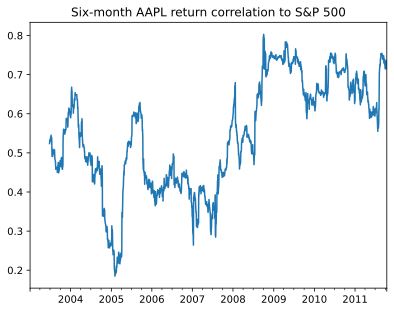

In [62]:
corr = returns['AAPL'].rolling(125).corr(returns['SPX'])

corr.plot(title="Six-month AAPL return correlation to S&P 500")

<Axes: title={'center': 'Six-month return correlations to S&P 500'}>

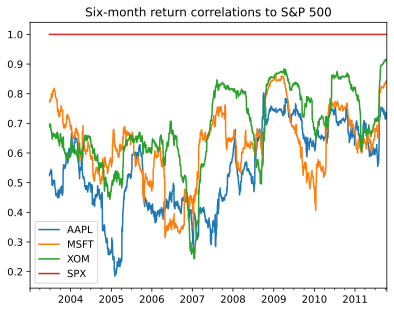

In [63]:
corr = returns.rolling(125).corr(returns['SPX'])

corr.plot(title="Six-month return correlations to S&P 500")